In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

En data science, quelles sont les différentes façons de gérer les valeurs manquantes dans un jeu de données en Python ?

Il existe plusieurs façons de gérer les valeurs manquantes dans un jeu de données en Python, voici quelques-unes des méthodes les plus couramment utilisées :

Suppression de lignes : l'ensemble des lignes contenant des valeurs manquantes peut être simplement supprimé. Cette méthode est efficace lorsque le nombre de valeurs manquantes est faible par rapport à la taille totale du jeu de données.

Remplacement par la moyenne, la médiane ou la valeur la plus fréquente : cette méthode consiste à remplacer les valeurs manquantes par la moyenne, la médiane ou la valeur la plus fréquente de la variable concernée. Cette méthode est souvent utilisée pour les variables numériques.

Imputation basée sur les données : cette méthode utilise des techniques d'apprentissage automatique pour prédire les valeurs manquantes en utilisant les valeurs des autres variables.

Utilisation de la technique de régression : cette méthode utilise une régression pour prédire les valeurs manquantes basées sur les autres variables.

Utilisation de la technique d'algorithme de clustering : cette méthode utilise un algorithme de clustering pour regrouper les observations similaires et remplacer les valeurs manquantes par la valeur la plus fréquente du groupe.

Utilisation de la technique de l'arbre de décision : cette méthode utilise une arbre de décision pour remplacer les valeurs manquantes basées sur les autres variables.

Il est important de noter que la méthode choisie dépendra de la situation spécifique et de la qualité des données, il faut donc évaluer les différentes options avant de prendre une décision.

Peux-tu me donner d'autres possibilités, comme l'interpolation, ainsi que plus de détails techniques sur comment implémenter chacune de ces méthodes en utilisant l'écosystème Python, telles que les librairies Pandas, Numpy, Scipy, etc ?

Oui, voici d'autres possibilités pour gérer les valeurs manquantes en Python :

Interpolation : cette méthode consiste à remplacer les valeurs manquantes en utilisant une interpolation linéaire ou une interpolation par splines pour remplir les valeurs manquantes. Cette méthode est souvent utilisée pour les variables numériques continues.

Utilisation de la technique de l'imputation par une valeur arbitraire : cette méthode consiste à remplacer les valeurs manquantes par une valeur arbitraire, comme 0 ou -1. Cette méthode est souvent utilisée pour les variables numériques ou catégoriques.

Voici quelques détails techniques sur comment implémenter ces méthodes en utilisant l'écosystème Python :

Suppression de lignes : vous pouvez utiliser la fonction dropna() de la librairie Pandas pour supprimer les lignes contenant des valeurs manquantes.

Remplacement par la moyenne, la médiane ou la valeur la plus fréquente : vous pouvez utiliser les fonctions fillna() et mean(), median(), mode() de la librairie Pandas pour remplacer les valeurs manquantes par la moyenne, la médiane ou la valeur la plus fréquente de la variable concernée.

Imputation basée sur les données : vous pouvez utiliser les librairies sklearn.impute pour imputer les valeurs manquantes en utilisant les algorithmes de régression, de clustering ou d'arbre de décision.

Interpolation : vous pouvez utiliser la fonction interpolate() de la librairie Pandas pour remplacer les valeurs manquantes en utilisant une interpolation linéaire ou une interpolation par splines.

Imputation par une valeur arbitraire : vous pouvez utiliser la fonction fillna() de la librairie Pandas pour remplacer les valeurs manquantes par une valeur arbitraire.

Il est important de noter que chaque méthode a ses avantages et ses inconvénients, il est donc essentiel de comprendre les données et les variables en question avant de choisir la méthode d'imputation appropriée. Il est aussi important de vérifier la qualité des données imputées et de faire des hypothèses sur les valeurs manquantes pour éviter de fausser les résultats.

Merci, peux-tu maintenant me donner des exemples de code pour chacune des méthodes citées dans ta précédente réponse ?

Bien sûr, voici des exemples de code pour chacune des méthodes de gestion des valeurs manquantes que j'ai mentionnées :



#### Jeu de données d'exemple

In [148]:
np.random.seed(42)

In [149]:
df = pd.DataFrame()

In [150]:
a = np.random.randint(0, 10, size=(5, 2))

In [151]:
a = pd.DataFrame(a, columns=["Colonne1", "Colonne2"])

In [152]:
a

,Colonne1,Colonne2
0,6,3
1,7,4
2,6,9
3,2,6
4,7,4


In [153]:
a.iloc[0, 1] = np.nan
a.iloc[4, 1] = np.nan

In [154]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


#### Suppression de lignes :

In [155]:
df = a.copy()

# Supprimer les lignes contenant des valeurs manquantes
df = df.dropna()

In [156]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


In [157]:
df

,Colonne1,Colonne2
1,7,4.0
2,6,9.0
3,2,6.0


#### Remplacement par la moyenne :

In [158]:
df = a.copy()

# Calculer la moyenne pour chaque colonne numérique
mean = df.mean()

print(f"La moyenne de la colonne 2 : {mean}")

# Remplacer les valeurs manquantes par la moyenne pour chaque colonne numérique
df = df.fillna(mean)

La moyenne de la colonne 2 : Colonne1    5.600000
Colonne2    6.333333
dtype: float64


In [159]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


In [160]:
df

,Colonne1,Colonne2
0,6,6.333333
1,7,4.000000
2,6,9.000000
3,2,6.000000
4,7,6.333333


#### Imputation basée sur les données :

In [180]:
df = a.copy()

from sklearn.impute import KNNImputer

# Instancier un objet KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Appliquer l'imputation à toutes les colonnes numériques
df_imputed = imputer.fit_transform(df)

# Mettre à jour le DataFrame
df = pd.DataFrame(df_imputed, columns=df.columns)

In [181]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


In [182]:
df

,Colonne1,Colonne2
0,6.0,6.5
1,7.0,4.0
2,6.0,9.0
3,2.0,6.0
4,7.0,6.5


In [183]:
df["ValeurColonne2Absente"] = False

In [186]:
df["ValeurColonne2Absente"][0] = True
df["ValeurColonne2Absente"][4] = True

/tmp/ipykernel_14254/2866296962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ValeurColonne2Absente"][0] = True
/tmp/ipykernel_14254/2866296962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ValeurColonne2Absente"][4] = True


In [187]:
df

,Colonne1,Colonne2,ValeurColonne2Absente
0,6.0,6.5,True
1,7.0,4.0,False
2,6.0,9.0,False
3,2.0,6.0,False
4,7.0,6.5,True


#### Interpolation :

In [167]:
df = a.copy()

# Interpolation linéaire pour remplir les valeurs manquantes
df = df.interpolate()

In [168]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


In [169]:
df

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,6.0


<AxesSubplot: xlabel='Colonne1'>

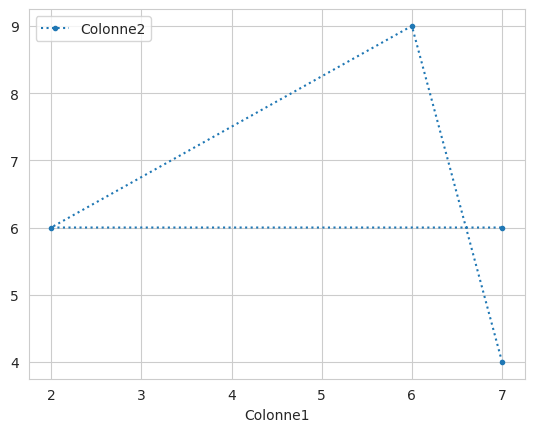

In [170]:
df.plot("Colonne1", "Colonne2", linestyle="dotted", marker=".")

#### Imputation par une valeur arbitraire :

In [171]:
df = a.copy()

# Remplacement des valeurs manquantes par -1 pour toutes les colonnes
df = df.fillna(-1)

In [172]:
a

,Colonne1,Colonne2
0,6,NaN
1,7,4.0
2,6,9.0
3,2,6.0
4,7,NaN


In [173]:
df

,Colonne1,Colonne2
0,6,-1.0
1,7,4.0
2,6,9.0
3,2,6.0
4,7,-1.0
